<a href="https://colab.research.google.com/github/aminaalisheva/Kazakh-Language-Text-Tokenization-and-Preprocessing-with-dataset-of-Fairytales/blob/main/SOURCE_CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#TASK 1 TOKENIZATION
from google.colab import drive
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
from nltk.tokenize import sent_tokenize
import nltk
from transformers import AutoTokenizer

# Mount Google Drive
drive.mount('/content/drive')

# Load Dataset
file_path = "/content/drive/MyDrive/kazakh_tales.csv"
df = pd.read_csv(file_path, encoding="utf-8")

kazakh_pattern = r'\b[\wәғқңүұөһі-]+\b'
tokens = []
text_data = df['text']

# Tokenize text data
for text in text_data:
    text = re.sub(r'(\b\w+)-(\b\w+)\b', lambda m: m.group(1) if m.group(1) == m.group(2) else m.group(0),
                  text.lower())  # Merge only duplicate hyphenated words
    tokens.extend(re.findall(kazakh_pattern, text))

# Token and Vocabulary Statistics
num_tokens = len(tokens)
num_types = len(set(tokens))
word_freq = Counter(tokens)

# Print token statistics
print(f"Total Tokens: {num_tokens}")
print(f"Unique Words (Types): {num_types}")
print("Word Frequencies (Top 10):")
for word, freq in word_freq.most_common(10):
    print(f"{word}: {freq}")


Mounted at /content/drive


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/kazakh_tales.csv'

Heaps' Law Parameters: k = 9.4296, beta = 0.6652


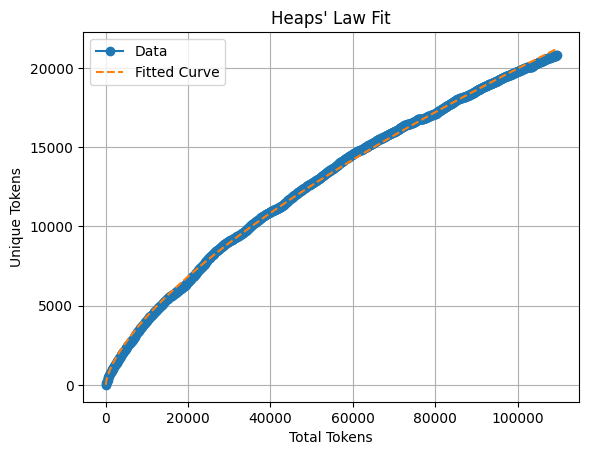

In [ ]:
#TASK 2 HEAP'S LAW
def heaps_law(n, k, b):
    return k * (n ** b)

def compute_heaps_law(tokens, sample_size=1000):
    total_tokens = np.linspace(1, len(tokens), sample_size, dtype=int)
    unique_tokens = np.array([len(set(tokens[:i])) for i in total_tokens])
    params, _ = curve_fit(heaps_law, total_tokens, unique_tokens, p0=[10, 0.5])
    return params, total_tokens, unique_tokens

params, total_tokens, unique_tokens = compute_heaps_law(tokens)
k, beta = params
print(f"Heaps' Law Parameters: k = {k:.4f}, beta = {beta:.4f}")

plt.plot(total_tokens, unique_tokens, marker='o', label='Data')
plt.plot(total_tokens, heaps_law(total_tokens, k, beta), label='Fitted Curve', linestyle='--')
plt.xlabel('Total Tokens')
plt.ylabel('Unique Tokens')
plt.title("Heaps' Law Fit")
plt.legend()
plt.grid()
plt.show()

In [ ]:
#TASK 3 BPE
# Define Kazakh tokenization pattern
kazakh_pattern = r'\b[\wәғқңүұөһі-]+\b'

# Tokenize corpus (extract words)
corpus = []
for text in df['text']:
    text = str(text).lower()  # Convert to lowercase
    words = re.findall(kazakh_pattern, text)  # Extract words using regex
    for word in words:
        # Split word into characters and add space between them, then append '_'
        char_list = ' '.join(list(word))
        corpus.append(char_list)  # Add processed word to corpus

# Print the processed corpus
print("Processed Corpus with Characters and Word Boundaries:")
for item in corpus[:10]:  # Display first 10 items to check
    print(item)

def BPE(corpus, k):
    # Step 1: Extract unique characters from the corpus
    vocab = sorted(set(''.join(corpus)))  # Get unique characters from words
    print("Unique Characters in the Corpus:")
    print(vocab)

    # Step 2: Perform k BPE merges
    for i in range(k):
        # Count frequency of character pairs
        pairs = Counter()
        for word in corpus:
            chars = word.split()
            for j in range(len(chars) - 1):
                pairs[(chars[j], chars[j + 1])] += 1

        # If no pairs left, stop
        if not pairs:
            break

        # Find most frequent pair
        best_pair = max(pairs, key=pairs.get)
        print(f"Step {i+1}: Merging {best_pair}")

        # Merge the most frequent pair
        corpus = [re.sub(r'(?<!\S){} {}\b'.format(*best_pair), ''.join(best_pair), word) for word in corpus]
        vocab.append(''.join(best_pair))  # Add the merged pair (e.g., 'ab') to vocab

    print("\nFinal BPE Vocabulary:")
    print(vocab)

# Run BPE with k merges
BPE(corpus, k=1000)

Processed Corpus with Characters and Word Boundaries:
қ а з а қ
х а л қ ы н ы ң
ұ л т т ы қ
е р т е г і л е р і
ж о л б а р ы с
б і р
т ү л к і н і
ұ с т а п
а л а д ы
т ү л к і
Unique Characters in the Corpus:
[' ', '-', '0', '1', '3', '4', '6', '7', '9', 'a', 'c', 'e', 'g', 'i', 'k', 'l', 'm', 'o', 'p', 'r', 't', 'v', 'x', 'y', 'z', 'а', 'б', 'в', 'г', 'д', 'е', 'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ы', 'ь', 'э', 'ю', 'я', 'і', 'ғ', 'қ', 'ң', 'ү', 'ұ', 'һ', 'ә', 'ө']
Step 1: Merging ('а', 'н')
Step 2: Merging ('е', 'н')
Step 3: Merging ('а', 'л')
Step 4: Merging ('а', 'р')
Step 5: Merging ('а', 'й')
Step 6: Merging ('ы', 'н')
Step 7: Merging ('д', 'ы')
Step 8: Merging ('д', 'е')
Step 9: Merging ('д', 'і')
Step 10: Merging ('і', 'н')
Step 11: Merging ('к', 'е')
Step 12: Merging ('ы', 'п')
Step 13: Merging ('о', 'л')
Step 14: Merging ('і', 'р')
Step 15: Merging ('д', 'а')
Step 16: Merging ('е', 'р')
Step 17: Merging ('а', '

In [ ]:
#TASK 4 SENTENCE SEGMENTATION
from google.colab import drive
import pandas as pd
import re

# Mount Google Drive
drive.mount('/content/drive')

# Load Dataset
file_path = "/content/drive/MyDrive/3-year SEDS/NLP_benchmark/ass1/dataset.csv"
df = pd.read_csv(file_path, encoding="utf-8")

def segment_sentences(text):
    # Normalize spaces around punctuation marks
    text = re.sub(r'(?<=[.!?])(?=[^\s])', r' ', text)  # Add space if missing after punctuation
    text = re.sub(r'\s+', r' ', text)  # Normalize multiple spaces to a single space

    # Split into paragraphs based on multiple newlines
    paragraphs = re.split(r'\n+', text)

    # Define an enhanced regex pattern for sentence splitting
    # This pattern handles dialogue markers (—) and nested punctuation (« »)
    pattern = r'(?<!\d)(?<![—-])(?<=[.!?])\s+(?=(?:— |[«“‘„]?[А-ЯӘӨҰҮҚҒ]))'

    # Apply sentence splitting within each paragraph
    sentences = []
    for paragraph in paragraphs:
        sentences.extend(re.split(pattern, paragraph))

    # Remove any empty strings and strip spaces
    sentences = [sentence.strip() for sentence in sentences if sentence.strip()]

    return sentences
# Apply Sentence Segmentation to the Dataset
df['segmented_sentences'] = df['text'].apply(segment_sentences)

# Display the segmented sentences
for index, row in df.iterrows():
    print(f"Text {index + 1}:")
    for i, sentence in enumerate(row['segmented_sentences'], 1):
        print(f"{i}. {sentence}")
    print("\n")

# Save the segmented sentences to a new CSV file
output_file_path = "/content/drive/MyDrive/3-year SEDS/NLP_benchmark/ass1/segmented_dataset.csv"
df.to_csv(output_file_path, index=False, encoding="utf-8")

print("Sentence segmentation completed and saved to segmented_dataset.csv")

Выходные данные были обрезаны до нескольких последних строк (5000).
103. Олар пешке алғысын айтып, үйіне келеді.
104. Артынша қаладан әкесі мен анасы оралады.
105. Қызы Маша мен кішкентай ұлдары Ваняға мол сыйлық береді.


Text 131:
1. Антуан де Сент-Экзюпери Бірде, алты жастағы кезімде, жабайы орман туралы «Бастан кешкен оқиғалар» деп аталатын кітаптан ғажайып бір сурет көрдім.
2. Суретте айдаһар жылан арыстанды бүтіндей жұтып жатты.
3. Сол суреттің көшірмесі мынадай: Кітапта былай деп жазылған: «Айдаһар жыландар жемтігін шайнамай бүтіндей жұтады.
4. Содан кейін олар алты ай бойы қозғалмастан, тамағын қорытады екен».
5. Сол сәтте менің джунгли оқиғалары жайлы ойларым сан саққа жүгірді.
6. Мен қолыма түрлі түсті қарындаш алып, тұңғыш суретімді сала бастадым.
7. Менің нөмірі бірінші суретімнің пішіні былай еді.
8. Мен бұл өнер туындысынересек кісілерге көрсеттім де, олардан суретім қорқыныш тудырады ма деп сұрадым.
9. Олар: «Қалпақ та қорқынышты болады ма екен? » -десті.
10. Ал менің са

In [ ]:
#KAZAKH DICTIONARY
import pandas as pd
import re
import numpy as np
# Load your dataset (assuming it's a text file or CSV with a column containing text)
df = pd.read_csv("hf://datasets/Nothingger/Kazakh-Literature-Collection/books_dataset.csv")

# Combine all text into one large string
all_text = ' '.join(df['text'].dropna())

# Normalize and tokenize the text (remove punctuation, lowercase everything)
kazakh_pattern = r'\b[\wәғқңүұөһі-]+\b'
tokens = []
text_data = df['text']

# Tokenize text data
for text in text_data:
    text = re.sub(r'(\b\w+)-(\b\w+)\b', lambda m: m.group(1) if m.group(1) == m.group(2) else m.group(0),
                  text.lower())  # Merge only duplicate hyphenated words
    tokens.extend(re.findall(kazakh_pattern, text))

# Create a set of unique words
unique_words = set(tokens)

# Convert the unique words to a DataFrame
dictionary = pd.DataFrame(list(unique_words), columns=['unique_words'])

# Save the unique words to a new CSV file
dictionary.to_csv('dictionary.csv', index=False)

# Display a few unique words
dictionary.head()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


,unique_words
0,шақпа
1,шалдығып
2,ататайым
3,тәбетін
4,қатайған


In [ ]:
pip install python-Levenshtein

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.7/162.7 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 34.3 MB/s eta 0:00:00


In [ ]:
#TASK 5 SPELLING CHECKER
import pandas as pd
import Levenshtein

# Load the dictionary (unique words)
dictionary_df = pd.read_csv('dictionary.csv')
dictionary = set(dictionary_df['unique_words'])

# Function to calculate Levenshtein distance
def levenshtein_distance(word1, word2):
    return Levenshtein.distance(word1, word2)

# Function to check the spelling of a word
def check_spelling(word, dictionary, threshold=2):
    if word in dictionary:
        return f"'{word}' is correctly spelled."
    else:
        # Find the words with the smallest Levenshtein distance to the given word
        suggestions = [(dict_word, levenshtein_distance(word, dict_word)) for dict_word in dictionary]
        suggestions = sorted(suggestions, key=lambda x: x[1])

        # Filter suggestions based on the threshold
        close_matches = [word for word, dist in suggestions if dist <= threshold]

        if close_matches:
            return f"'{word}' might be misspelled. Suggestions: {', '.join(close_matches)}"
        else:
            return f"'{word}' might be misspelled. No close matches found."

# Example of checking spelling
misspelled_word = "орнек"
result = check_spelling(misspelled_word, dictionary)
print(result)

misspelled_word = "бармак"
result = check_spelling(misspelled_word, dictionary)
print(result)

misspelled_word = "дамбра"
result = check_spelling(misspelled_word, dictionary)
print(result)

misspelled_word = "лайық"
result = check_spelling(misspelled_word, dictionary)
print(result)

misspelled_word = "кемпир"
result = check_spelling(misspelled_word, dictionary)
print(result)

'орнек' might be misspelled. Suggestions: өрнек, ермек, ортак, орнап, әрне, орден, ордер, ернеу, қорек, орнын, орным, рек, ерек, грек, орның, үркек, ореке, көрнек, түнек, өрмек, үрпек, ораев, орнар, еркек, күнек, осек, көнек, орны, әйнек, орфей, ормен, ертек, сенек, орипек, өргек, орес, жанек, орск, орна, ортеке, ирек, орнай, корнет, орел, орынбек
'бармак' might be misspelled. Suggestions: барма, бармай, бармақ, барак, бармау, бармап, бармас, барра, барға, бірак, барақ, барлар, баран, бареам, қармақ, жармас, бара, барчук, барба, арма, бауман, барсаң, барам, қармай, барлас, бардай, бардан, бармады, барша, бұрмақ, барсам, армап, бартал, маршак, бермек, барар, каймак, бұрқак, бұрмап, бар-ақ, барсақ, бұрма, бармен, бармаса, армар, баркас, барғам, бармағы, башмақ, жармау, арак, барлап, бармыз, арман, баржа, бармасы, бармын, бір-ак, қарман, ермак, барла, бархан, барда, барлай, бар-ау, ғарма, барған, сарман, жарма, бар-ай, бұрмай, барлау, брак, бартан, барса, нардак, барад, парман, тармақ, бі

In [ ]:
#TASK 5 SPELLING CHECKER
import pandas as pd
import Levenshtein

# Load the dictionary (unique words)
dictionary_df = pd.read_csv('dictionary.csv')
dictionary = set(dictionary_df['unique_words'])

# Letter-specific weights
letter_weights = {
    ('а', 'ә'): 0.5, ('о', 'ө'): 0.5, ('и', 'і'): 0.5, ('у', 'ү'): 0.5, ('у', 'ұ'): 0.5,
    ('г', 'ғ'): 0.5, ('н', 'ң'): 0.5
}

def weighted_levenshtein_distance(word1, word2, insertion_weight=1, deletion_weight=1, substitution_weight=2):
    distance = 0
    len1, len2 = len(word1), len(word2)

    for i in range(min(len1, len2)):
        if word1[i] != word2[i]:
            if (word1[i], word2[i]) in letter_weights:
                distance += letter_weights[(word1[i], word2[i])]
            elif (word2[i], word1[i]) in letter_weights:
                distance += letter_weights[(word2[i], word1[i])]
            else:
                distance += substitution_weight

    distance += abs(len1 - len2) * deletion_weight
    return distance

# Function to check the spelling of a word
def check_spelling(word, dictionary, threshold=2):
    if word in dictionary:
        return f"'{word}' is correctly spelled."
    else:
        # Find the words with the smallest Levenshtein distance to the given word
        suggestions = [(dict_word, weighted_levenshtein_distance(word, dict_word)) for dict_word in dictionary]
        suggestions = sorted(suggestions, key=lambda x: x[1])

        # Filter suggestions based on the threshold
        close_matches = [word for word, dist in suggestions if dist <= threshold]

        if close_matches:
            return f"'{word}' might be misspelled. Suggestions: {', '.join(close_matches)}"
        else:
            return f"'{word}' might be misspelled. No close matches found."

# Example of checking spelling
misspelled_words = ["адеми", "дамбра", "кол", "бармак", "тил", "орнек", "менин", "сенин", "биз", "оларга",
                   "кемпир", "тири", "каракоз", "корек", "жетип", "жугир", "агаш", "галым", "куй", "кун",
                   "бугин", "оган", "торгай", "каттырак", "жалгыз", "адет", "аріп", "атеш", "арқашан", "ангіме",
                   "аскер", "коресин", "иримшик", "исте", "журек", "секирген", "соккан", "карапайым", "жалкау", "омир",
                   "турсай", "жиберген", "киим", "кайшы", "келиссоз", "корши", "тистер", "ага", "тырнак"]

for misspelled_word in misspelled_words:
  result = check_spelling(misspelled_word, dictionary)
  print(result)

'адеми' might be misspelled. Suggestions: әдемі, адами
'дамбра' might be misspelled. Suggestions: домбра
'кол' might be misspelled. Suggestions: көл, коля, көлі, кө, қол, эол, к, кош, кой, мол, кос, тол, гол, сол, күл, кәл, кіл, вол, колын, кил, кeл, кою, кок, бол, кэл, кұл, коп, колға, жол, кел, ког, коя
'бармак' might be misspelled. Suggestions: барма, бармап, бармас, бармай, бармақ, бармау
'тил' might be misspelled. Suggestions: тіл, ти, тіле, тілі, ті, тұл, тиe, тiл, тию, төл, тәл, тел, тир, тол, тыл, нил, тиз, тик, тис, тип, т, тилек, кил, сил, тал, тия, тие, фил
'орнек' might be misspelled. Suggestions: өрнек
'менин' might be misspelled. Suggestions: менін, мени, меңін, менің, менінң, меңің, мені, менен, мен, монин, меңі, ленин
'сенин' might be misspelled. Suggestions: сенін, сенің, сені, сеңі, сен, сеніңі, ленин, сенен
'биз' might be misspelled. Suggestions: біз, би, бізі, бі, бпз, бир, бөз, биі, быз, бит, биқ, бик, тиз, бәз, б, бие, бис, биш, без, бию, боз, бин, бoз, бiз, баз, 

In [ ]:
import pandas as pd
import random
from collections import Counter

# Load the dictionary (unique words from 'dictionary.csv')
dictionary_df = pd.read_csv('dictionary.csv')
dictionary = set(dictionary_df['unique_words'])

# Function to check if a word is misspelled (not in the dictionary)
def is_misspelled(word, dictionary):
    return word not in dictionary

# Create a confusion matrix for spell checking using counters
def confusion_matrix_spelling(incorrect_words, correct_words, dictionary):
    # Initialize counters for TP, TN, FP, FN
    counter = Counter({'TP': 0, 'TN': 0, 'FP': 0, 'FN': 0})

    # Check for incorrect words (misspelled words)
    for word in incorrect_words:
        if is_misspelled(word, dictionary):
            counter['TP'] += 1  # Incorrect word correctly identified as misspelled
        else:
            counter['FN'] += 1  # Incorrect word missed (not flagged as misspelled)

    # Check for correct words (words that are correctly spelled)
    for word in correct_words:
        if not is_misspelled(word, dictionary):
            counter['TN'] += 1  # Correct word correctly identified
        else:
            counter['FP'] += 1  # Correct word incorrectly identified as misspelled

    # Calculate accuracy, precision, recall, and F1 score
    TP, TN, FP, FN = counter['TP'], counter['TN'], counter['FP'], counter['FN']
    accuracy = (TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) > 0 else 0
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return counter, accuracy, precision, recall, f1

# Convert dictionary set to a list
dictionary_list = list(dictionary)

test_text = "Бир куні ауылдар шетинде турган жас бала ормандар серуендеу шығып.",
"Олар айналасына таңдана қарап, табигаттың сулулыгына тамсанды. Аспаннан кун шуагын шашп, ",
"құстардан ані жүрег жылытып тұрды. Ол терен өзенді бойымен жүріп, үлкен емен агашынын",
" түбін де демалды. Бір кезде алыстан бір дауысты естіді. Бұл дауыс қарт аңшыныкі еді. Аңшы",
" балада ормандағы тіршілік туралы қызықы әңгімелер айтып берді. Олар бірге табиғатты қорғаудың",
" маңызды туралы сөйлесті. Бала орман үйіне қайтарда, табиғатты аялау керектігін тусинди. "
"Бұл күн оның омириндеги ең асерли күндер бири болды."

# Generate 50 test words (mix of correct and incorrect words)
correct_words = ["жас", "бала", "айналасына", "таңдана", "қарап", "тамсанды", "аспаннан", "жылытып", "тұрды", "ол",
                   "бойымен", "жүріп", "ү", "шашп", "құстардан", "ані", "жүрег", "терен", "өзенді", "агашынын",
                   "түбін", "қызықы", "балада", "маңызды", "орман", "асерли", "бири", "тусинди", "омириндеги", "күндер"]

incorrect_words = ["бир", "куни", "ауылдар", "шетинде", "турган", "ормандар", "серуендеу", "шығып", "олар", "табигаттың",
                   "сулулыгына", "кун", "шуагын", "шашп", "құстардан", "ані", "жүрег", "терен", "өзенді", "агашынын",
                   "түбін", "қызықы", "балада", "маңызды", "орман", "асерли", "бири", "тусинди", "омириндеги", "күндер"]

# Compute confusion matrix and evaluation metrics
confusion_counter, accuracy, precision, recall, f1 = confusion_matrix_spelling(incorrect_words, correct_words, dictionary)

# Print results
print("\nConfusion Matrix (using counters):")
print(f"True Positives (TP): {confusion_counter['TP']}")
print(f"True Negatives (TN): {confusion_counter['TN']}")
print(f"False Positives (FP): {confusion_counter['FP']}")
print(f"False Negatives (FN): {confusion_counter['FN']}")

print("\nEvaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

FileNotFoundError: [Errno 2] No such file or directory: 'dictionary.csv'